<a href="https://www.kaggle.com/code/lekhatopil/diwali-sales-exploratory-data-analysis?scriptVersionId=291392189" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Project Overview**

This project aims to uncover key insights into **sales trends, consumer behavior, and business impact during Diwali sales**. Through detailed **Exploratory Data Analysis (EDA)**, I examined factors influencing sales generation, distribution across industries, geographical sales patterns, and top-performing product categories.

In [1]:
# Import Packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load data
df = pd.read_csv('../input/diwali-sales-data/Diwali Sales Data.csv', encoding = 'unicode_escape')

In [3]:
# Display data
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
# Check data dimension
df.shape

(11251, 15)

# **Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## **Removing Blank Columns**

There are two blank columns in this data frame, **`Status`** and **`unnamed1`**, we need to drop these columns.

In [6]:
# Drop unrelated or blank columns
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [7]:
# Confirm whether both columns are doped or not
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# **Missing Values**

In [8]:
# Check for missing values 
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

- The **`Amount`** column has **12 missing values** and rest other columns do not contain any missing values.

## **Removing Missing Values**

Here, we will have to remove the rows with missing values because our further analysis is mainly based on the **`Amount`** column and only this column has missing values. 

In [9]:
# Remove missing values
df.dropna(inplace = True)
df.shape

(11239, 13)

There are **12 missing values** in the **Amount** column, accounting for **0.11%** of this data frame. In a real-world scenario, the decision to remove the missing values would depend on the context. Typically, missing values can be filled with the correct information, or imputed using the mean or median value. For this analysis, we will proceed by removing the missing values.

# **How many unique users are present in this data frame?**

In [10]:
# Check how many unique consumers are present in this data frame
df['User_ID'].nunique()

3752

- **`User_ID`** is not a unique variable for each row, it is a unique ID for each individual consumer.
  
-  There are **3,752 unique consumers** present in this data frame.

# **Checking For Duplicates**

In [11]:
df.duplicated().sum()

8

In [12]:
df[df.duplicated()].head(8)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345.0
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202.0
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304.0


- The above output shows the **8** rows that are duplicated in this data frame. 

- Is there a possibility that these entries are legitimate?  There may be a possibility that consumers may have purchased the same product twice and it is being shown as duplicate because the **User_ID** is the same for the same consumer and the **Amount** is same for the same product. And the rest of the details will also remain the same. However, further data exploration will be required to understand whether these entries are duplicates or not.

# **Data Inconsistency**

In [13]:
df[df['User_ID']==1001260]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
261,1001260,Dheeraj,P00274042,F,26-35,35,1,Madhya Pradesh,Central,Aviation,Footwear & Shoes,3,20477.0
4471,1001260,Dheeraj,P00225542,F,26-35,29,1,Gujarat,Western,Food Processing,Electronics & Gadgets,3,9812.0
5907,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0


Here if we check a particular **`User_ID`**, we found out that this particular consumer has placed the order four times, but in the **`Gender`** column, we could see that for two orders the gender specified is female and male for the other two orders. 

Now, this clearly indicates that the data in the **`Gender`** column has some problem. I have checked other **`User_ID`** from the duplicate records and found the same problem. This means that for some consumers with the same **`User_ID`**  the gender specified is different for different orders. 

This data frame does not contain **order date**, so we don't know when the order was placed by the consumers. The data for **some consumers is not consistent in the `Age` and `Occupation` columns**. The above data shows that this particular consumer belongs to **3 different industries and the age also varies substantially.**

Now talking about duplicate entries, why would a consumer order the same quantity for the same product? In this case, there could be two possibilities, first, the consumer might have ordered the same product on different dates depending on his/her requirement, and second, these could be duplicate entries.

The majority of the duplicate entries are from the **Electronics and gadgets product category.** Since we don't have more information (order date, time, and order id) about these **8 entries**, we won't remove them.

### **Change Data Type for `Amount` Column**

In [14]:
# Change data type for 'Amount' column
df['Amount'] = df['Amount'].astype('int')

In [15]:
df['Amount'].dtypes   

dtype('int64')

# **Summary Statistics**

In [16]:
# Use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


- Interestingly, the **maximum age of the consumer is 92 years** and the **minimum age is 12 years**. Here the question arises whether an underage person is allowed to register and make payment on an online e-commerce site. 

- The mean and median for **`Orders`** column is approximately the same, which indicates that the data in the **`Orders`** column is not skewed. 

- The mean of **`Amount`** column is slightly greater than the median, which indicates that the data distribution is  right skewed.  

In [17]:
df[['State', 'Occupation', 'Product_Category', 'Zone']].describe()

,State,Occupation,Product_Category,Zone
count,11239,11239,11239,11239
unique,16,15,18,5
top,Uttar Pradesh,IT Sector,Clothing & Apparel,Central
freq,1944,1583,2655,4289


- There are **16 unique `States`, 15 unique `Occupation`, 18 unique `Product_Category`, and 5 unique `Zone`** present in this data frame.

- The above summary data shows that the highest number of orders are received from the state of **Uttar Pradesh.**

- It seems that a large number of orders are received from consumers working in the **IT sector.**

- **Clothing and apparel** appear to be the most frequently cited product categories among consumers.

- It also seems that a good amount of orders are received from the **Central zone.** 

# **Exploratory Data Analysis**

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### **Check for unique value**

In [19]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [20]:
df['Marital_Status'].unique()

array([0, 1])

- There are two unique values present in the **`Gender` column - 'F'** indicating **Female** and **'M' indicating Male.**
  
- There are two unique values present in the **`Marital_status` column - '0' indicating Married and '1' indicating Unmarried.**

# **Examine Data Distribution and Outliers**

## **Amount Data Distribution by Gender** 

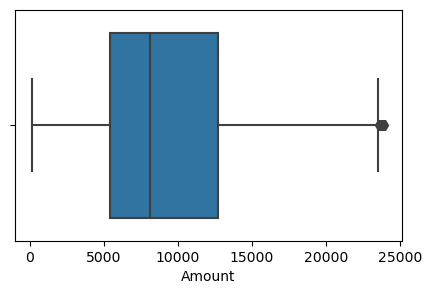

In [21]:
# Boxplot
plt.figure(figsize = (5, 3))
sns.boxplot(x = df['Amount']);

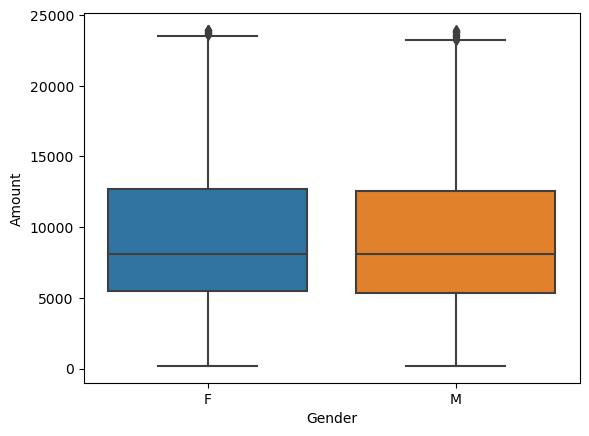

In [22]:
# Boxplot for `Amount` based on `Gender`
sns.boxplot(data = df, x = 'Gender', y = 'Amount');

In [23]:
# Descriptive Stats for `Amount` based on `Gender`
df.groupby('Gender')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,7832.0,9491.298902,5199.838878,188.0,5480.75,8114.0,12711.25,23952.0
M,3407.0,9366.972703,5273.497173,206.0,5371.50,8094.0,12526.00,23912.0


- The mean amount value is slightly higher for female consumers, and the median amount value is approximately the same for both genders. 

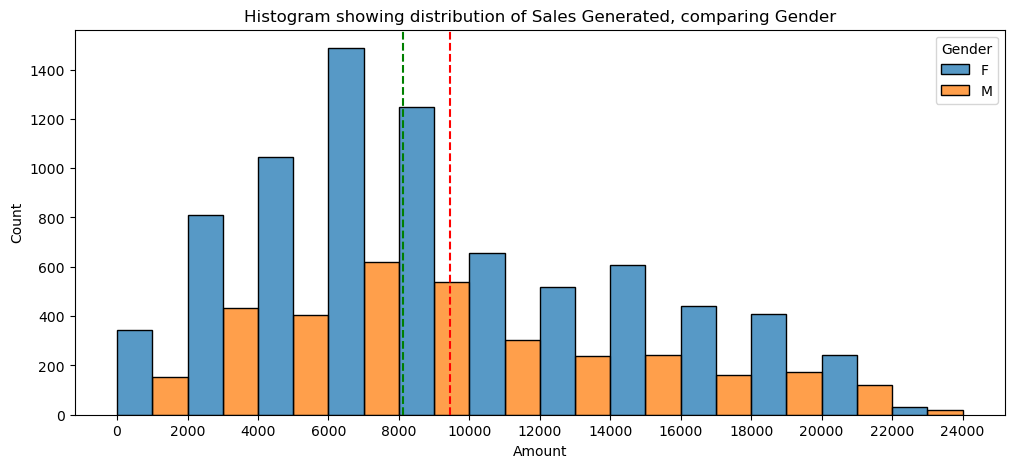

In [24]:
# Creat histogram showing distribution of 'Amount', comparing 'Gender'
plt.figure(figsize = (12, 5))
ax = sns.histplot(data = df, x = 'Amount', hue = 'Gender', multiple = 'dodge', bins = range(0, 24001, 2000))
ax.set_xticks(range(0, 24001, 2000))
plt.axvline(x = df['Amount'].mean(), color = 'red', ls = '--')
plt.axvline(x = df['Amount'].median(), color = 'green', ls = '--')
plt.title('Histogram showing distribution of Sales Generated, comparing Gender');

- The boxplot indicates that there are some **potential outliers in the `Amount` column.** 

- The histogram plot above shows that the data is **right skewed** for both genders. The **red line represents the 'mean' and green line represents the 'median'.**

- The mean in the **`Amount`** column is slightly greater than the median, which also indicates a right-skewed distribution. 

- The histogram plot also indicates that the **maximum sales generated** is from **female consumers.**

In [25]:
# Calculate outliers
percentile25 = df['Amount'].quantile(0.25)
percentile75 = df['Amount'].quantile(0.75)
iqr = percentile75 - percentile25
print('iqr:', iqr)

upper_limit = percentile75 + 1.5 * iqr
print('upper_limit:', upper_limit)

outliers = df[df['Amount'] > upper_limit]
print('Number of rows containing outliers in `Amount` column:', len(outliers))
print('----------------------------------------------------------------------------')

outliers.head()

iqr: 7232.0
upper_limit: 23523.0
Number of rows containing outliers in `Amount` column: 19
----------------------------------------------------------------------------


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [26]:
outliers[['Gender']].value_counts() 

Gender
F         11
M          8
dtype: int64

- Outliers in the **`Amount`** column **do not appear to be extreme values**. The maximum value is **23,952** and the upper limit is **23,523**, so the outlier values do not appear to be a **typo error** and seem to be a **legitimate value.** Therefore, outliers are not problematic in this case. 

## **Orders Data distribution by Gender**

In [27]:
# Descriptive Statistic
df.groupby(['Gender'])['Orders'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,7832.0,2.495914,1.113405,1.0,2.0,2.0,3.0,4.0
M,3407.0,2.475198,1.118579,1.0,1.0,2.0,3.0,4.0


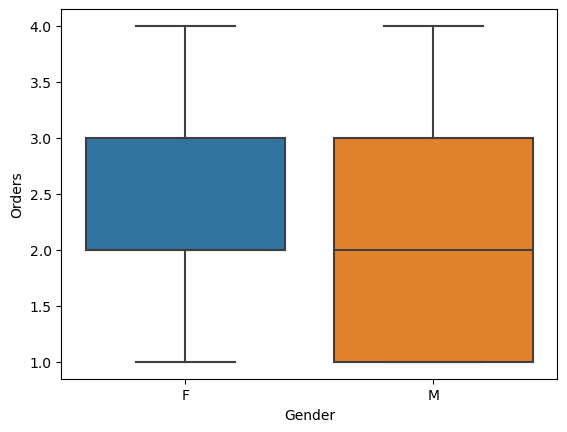

In [28]:
# Create boxplot
sns.boxplot(data = df, x = 'Gender', y = 'Orders');

•  **Female Consumers:** The absence of a median line and the box range from **2 to 3** suggests that a **significant proportion of female consumers** have placed **2 or 3 orders.** The median value at the lower end indicates that many female consumers are concentrated around the **2-order mark.**

•  **Male Consumers:** The box range from **1 to 3 with a median line at 2** suggests that male consumers **have a wider range of order quantities**, but the middle value is still **2**. This indicates that while male consumers have more variation in their order quantities, the central tendency is similar to that of female consumers.


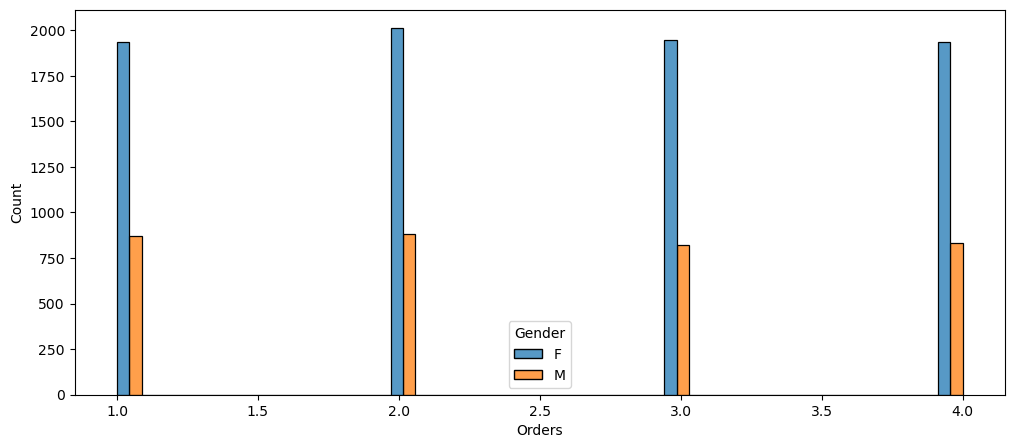

In [29]:
# Create histogram showing distribution of 'Orders', Comparing 'Gender'
plt.figure(figsize = (12, 5))
sns.histplot(data = df, x = 'Orders', hue = 'Gender', multiple = 'dodge');

- The boxplot indicates no outliers for both genders.
  
- The above histogram shows an approximately uniform distribution for both genders.  

## **Age Data distribution by Gender**

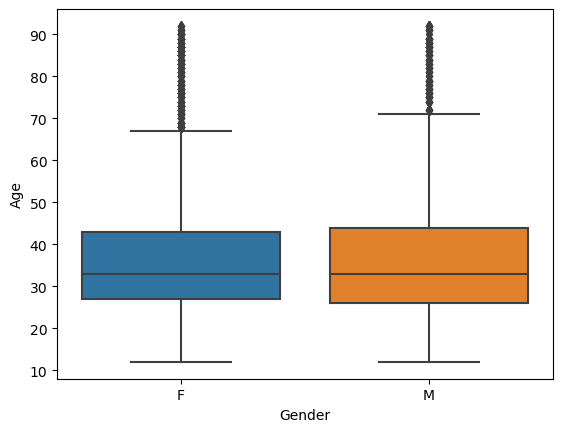

In [30]:
# Create boxplot of `Age` column
sns.boxplot(data = df, x = 'Gender', y = 'Age');

- The boxplot confirms that there are outliers in the **`Age`** column for both genders.

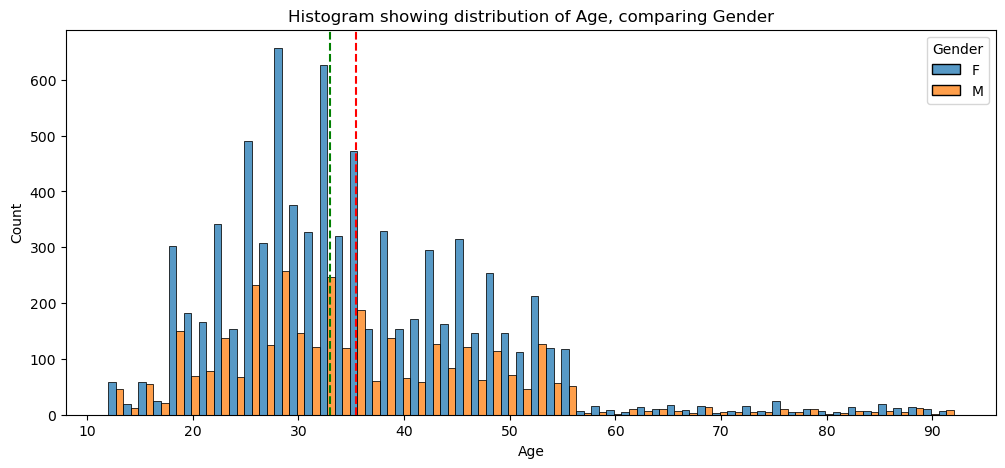

In [31]:
# Create a histogram showing distribution for `Age`, comparing `Gender`
plt.figure(figsize = (12, 5))
sns.histplot(data = df, x = 'Age', hue = 'Gender', multiple = 'dodge')
plt.axvline(x = df['Age'].mean(), color = 'red', ls = '--')
plt.axvline(x = df['Age'].median(), color = 'green', ls = '--')
plt.title('Histogram showing distribution of Age, comparing Gender');

- The age distribution for both genders is **heavily right-skewed** and contains **some extreme values** and **outliers**, as observed in the histogram.
  
- The above histogram plot indicates that the distribution for both genders shows **multiple peaks** and does not follow the bell-shaped curve characteristic of a normal distribution. The presence of multiple peaks and irregularities indicates deviations from a normal distribution. The distribution is more irregular, with several age groups having higher counts than others. We need to examine it further.

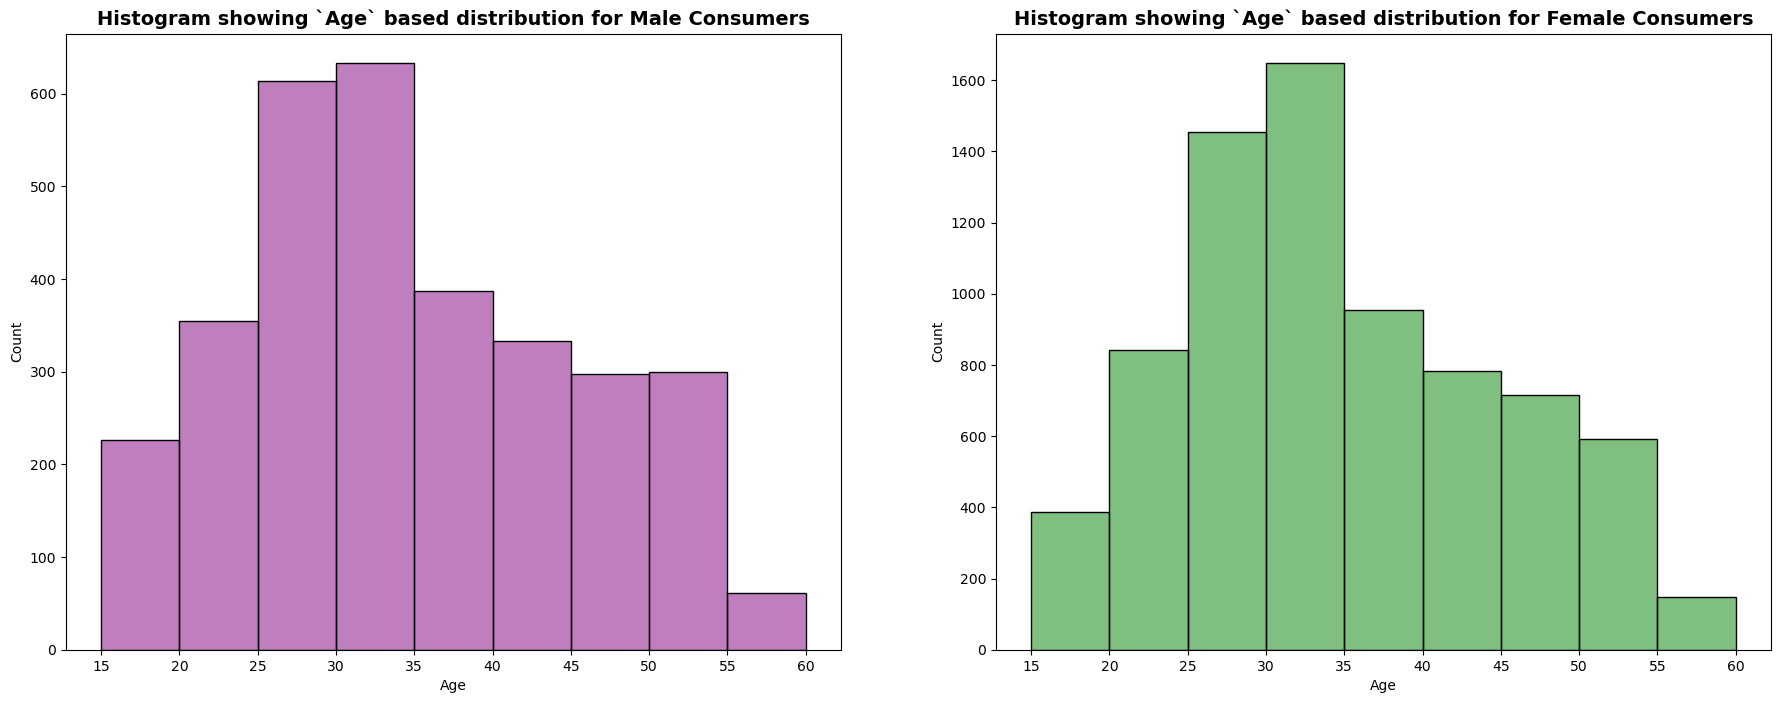

In [32]:
# Set figure and axes 
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Histogram showing `Age` based distribution for Male Consumers
a = sns.histplot(data = df[df['Gender'] == 'M'], x = 'Age', color = 'purple', 
                 alpha = 0.5, bins = range(15,61,5), ax=ax[0])
a.set_xticks(range(15,61,5))
ax[0].set_title('Histogram showing `Age` based distribution for Male Consumers', 
                fontsize= 14, weight = 'bold')


# Histogram showing `Age` based distribution for Female Consumers
b = sns.histplot(data = df[df['Gender'] == 'F'], x = 'Age', color = 'green', 
                 alpha = 0.5, bins = range(15,61,5), ax=ax[1])
b.set_xticks(range(15,61,5))
ax[1].set_title('Histogram showing `Age` based distribution for Female Consumers', 
                fontsize= 14, weight = 'bold');

The age distributions for both male and female consumers from the range of **15 to 60** exhibit some characteristics of normal distribution, such as having a peak around the age group of **30-35** and appearing somewhat symmetric. However, they do not perfectly follow a normal distribution.

### **Key Points:**

**Peak Age Group:** The age group of **30-35** shows the **highest concentration of consumers,** followed by the age group of **25-30.** This suggests that individuals in their early **30s** are the most common age group for purchasing

**Symmetry Around Peak:** There is a relatively balanced distribution around the peak age group, indicating that both younger and slightly older individuals are also significantly represented. This implies that the consumer base is spread out but still concentrated around the **early 30s.**

**Gender Differences:** The histograms for males and females show differences in the peaks or distributions, it does indicate **gender-specific trends** or preferences in purchasing. 

The boxplot indicated outliers in the **Age** column, so we now need to calculate these outliers.

In [33]:
# Calculate outliers
percentitle25 = df['Age'].quantile(0.25)
percentitle75 = df['Age'].quantile(0.75)
iqr = percentitle75 - percentitle25
print('iqr:', iqr)

upper_limit = percentitle75 + 1.5 * iqr
print('upper_limit:', upper_limit)

outliers = df[df['Age'] > upper_limit]
print('Numbers of rows in the data containing outliers in `Age` column:', len(outliers))
print('--------------------------------------------------------------------------------')

outliers.head()

iqr: 16.0
upper_limit: 67.0
Numbers of rows in the data containing outliers in `Age` column: 283
--------------------------------------------------------------------------------


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
24,1000900,Skaria,P00317842,M,55+,83,0,Karnataka,Southern,Automobile,Auto,3,23513
38,1002520,Mike,P00310342,M,55+,72,1,Himachal Pradesh,Northern,Media,Auto,4,23267
197,1001736,Martinez,P00227942,M,55+,72,1,Uttar Pradesh,Central,Textile,Footwear & Shoes,2,20603
234,1002201,Dodson,P00127642,F,55+,83,1,Madhya Pradesh,Central,Govt,Furniture,1,20533
275,1002760,McClure,P00101842,M,55+,77,1,Kerala,Southern,Lawyer,Footwear & Shoes,4,20440


In [34]:
outliers['Gender'].value_counts()

F    178
M    105
Name: Gender, dtype: int64

- Outliers in the **`Age`** column are present for both genders. Next, through scatterplot we need to examine the age-based purchasing patterns of all consumers. 

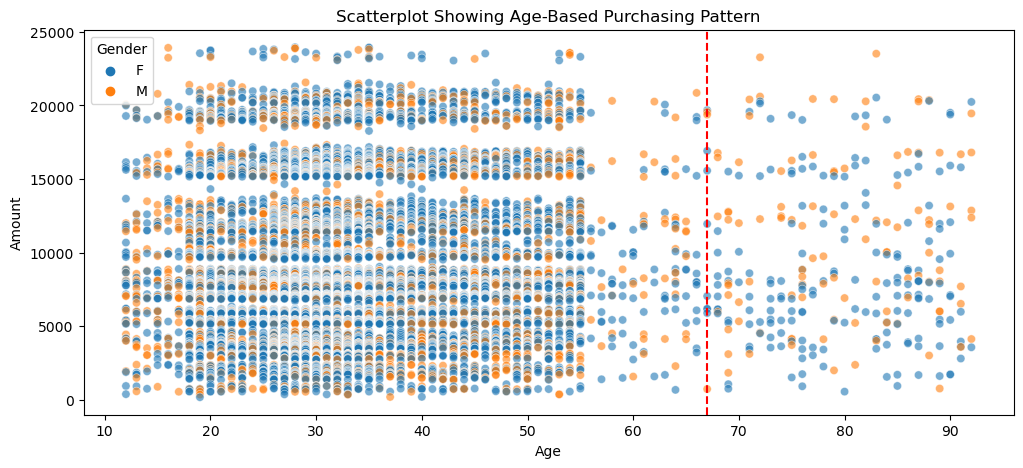

In [35]:
# Create Scatterplot
# Set plot size
plt.figure(figsize = (12, 5))

sns.scatterplot(data = df, x = 'Age', y = 'Amount', hue = 'Gender', alpha = 0.6)
plt.axvline(x = 67, color = 'red', ls = '--')
plt.title('Scatterplot Showing Age-Based Purchasing Pattern');

In [36]:
# Checking for total number of consumers above age of 90
print('Consumers 90 & above:', df[df['Age']>=90]['Age'].count())
print('Consumers 80 & above:', df[df['Age']>=80]['Age'].count())

Consumers 90 & above: 27
Consumers 80 & above: 144


•  **Outliers Above 67:** The red line at age **67** indicates that outliers in the **Age** column are determined as values above **67**.

•  **Consumers Aged 18 to 55:** A significant number of consumers fall within the age range of **18 to 55** for both genders. Most of these consumers make purchases **below 15,000**, and there is a notable number who make purchases ranging from **15,000 to approximately 22,000.**

•  **Purchasing Patterns:** The purchasing patterns of consumers above and below the age of **67** are almost the same, showing consistency in spending behavior.

•  **Older Consumers:** Interestingly, there are **144** consumers aged **80** and above, and **27** consumers aged **90** and above.


# **Number of Times Order Placed Based on Gender**

Orders placed by Female consumers: 7832
Order placed by Male consumers: 3407


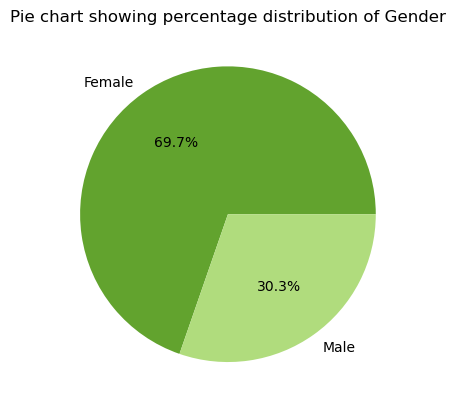

In [37]:
female = df[df['Gender']=='F'].shape
male = df[df['Gender']=='M'].shape

print('Orders placed by Female consumers:', female[0])
print('Order placed by Male consumers:', male[0])

# Create list for labels
list1 = ['Female', 'Male']

# Set seaborn color palette
col_palette = sns.color_palette('PiYG_r')

# Crete pie chart
plt.pie([female[0], male[0]], labels = list1, autopct = '%.1f%%', colors = col_palette)
plt.title('Pie chart showing percentage distribution of Gender');

- The above pie chart shows that orders are placed by female consumers approximately **70%** of the time. This means that orders have been placed **7,832 times** by female consumers. This clearly indicates that female consumers are generating most of the sales for the company.

- **30%** of orders are placed by male consumers. This means that orders have been placed **3,407** times by male consumers. 

# **Total Number of Quantity Sold & Total Sales Generated Based on Gender**

In [38]:
# Subset data
df1 = df.groupby(['Gender'], as_index = False)[['Amount', 'Orders']].sum().sort_values(
    by = 'Amount', ascending = False)

# Define function 
def readable_num(x):
    """takes a large number and formats it into Millions to make it more readable"""
    if x >= 1e6:
        a = '{:1.2f}'.format(x*1e-6)
    return a

# Create a new variable and apply the function to the `Amount` column 
df1['amount_readable'] = df1['Amount'].apply(readable_num)

# Convert the data type to `float`
df1['amount_readable'] = df1['amount_readable'].astype(float)

# Check the data type
df1['amount_readable'].dtype

dtype('float64')

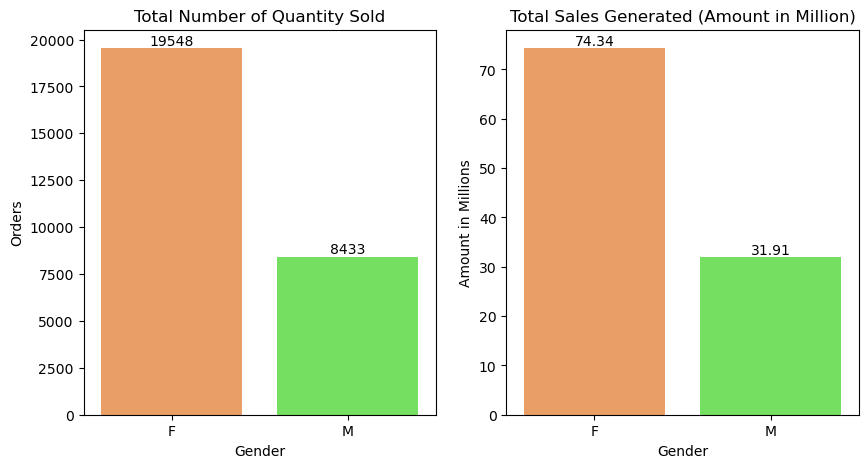

In [39]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

# Barplot showing total number of orders placed based on gender
a = sns.barplot(data = df1, x = 'Gender', y = 'Orders', ax=ax[0], palette = 'gist_ncar_r', alpha = 0.7)

# Add labels
for bars in a.containers:
    a.bar_label(bars)
    
ax[0].set_title('Total Number of Quantity Sold')

# Barplot showing total sales generated (amounts in millions) based on gender    
b = sns.barplot(data = df1, x = 'Gender', y = 'amount_readable', ax=ax[1], palette = 'gist_ncar_r', alpha = 0.7)
ax[1].set_ylabel('Amount in Millions')

# Add labels
for bars in b.containers:
    b.bar_label(bars)
ax[1].set_title('Total Sales Generated (Amount in Million)');  

In [40]:
print('Total Number of Quantity Sold:', df1['Orders'].sum())
print('Total Sales Generated:', df1['amount_readable'].sum(),'Million')

Total Number of Quantity Sold: 27981
Total Sales Generated: 106.25 Million


- The company generated a revenue of **106.25 million**, with **70%** of the sales coming from female consumers. 

# **Top 10 Consumers Based on Orders**

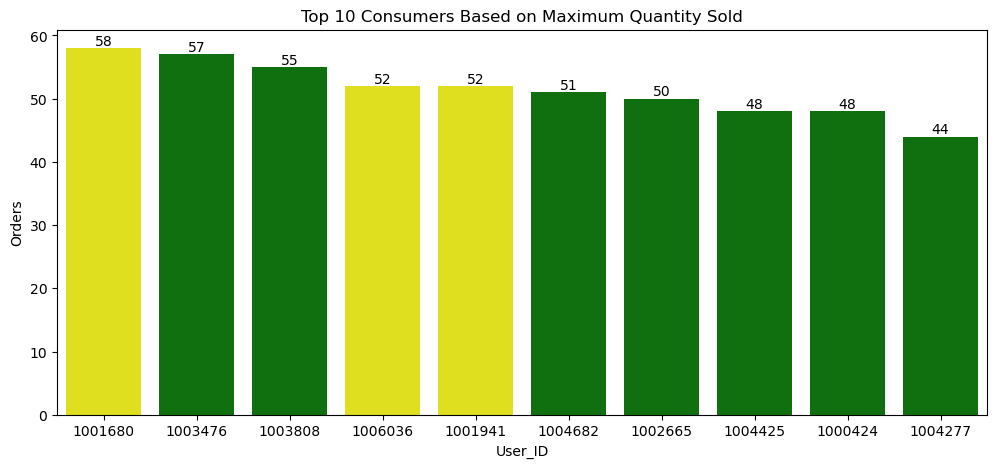

In [41]:
# Subset data
top_consumers = df[['User_ID', 'Orders', 'Gender']]


# Top 10 consumers based on maximum quantity sold
top_consumers = df.groupby(['User_ID', 'Gender'], as_index = False)['Orders'].sum().sort_values(
    by = 'Orders', ascending = False).head(10)


# Set color based on gender, green for female consumers and yellow for male consumers
col = []
for gender in top_consumers['Gender']:
    if gender == 'F':
        col.append('green')
    else:
        col.append('yellow')


# Create barplot
plt.figure(figsize = (12, 5))
c = sns.barplot(data = top_consumers, x = 'User_ID', y = 'Orders', palette = col,
                order = top_consumers.sort_values(by = 'Orders', ascending = False).User_ID)

# Add bar labels
for bars in c.containers:
    c.bar_label(bars)

plt.title('Top 10 Consumers Based on Maximum Quantity Sold');

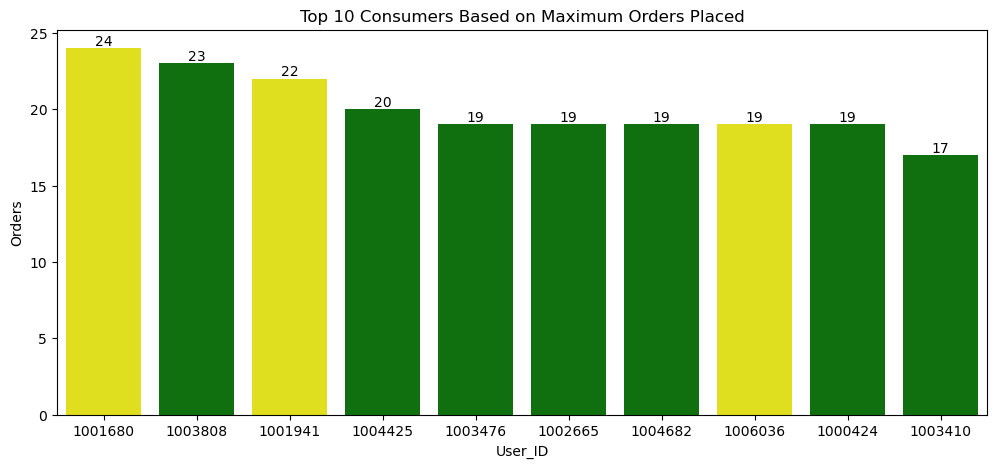

In [42]:
# Subset data
top_consumers1 = df[['User_ID', 'Orders', 'Gender']]

# Top 10 consumers based on maximum orders placed
top_consumers1 = df.groupby(['User_ID', 'Gender'], as_index = False)['Orders'].count().sort_values(
    by = 'Orders', ascending = False).head(10)

# Set color based on gender, green for female consumers and yellow for male consumers
col = []
for gender in top_consumers1['Gender']:
    if gender == 'F':
        col.append('green')
    else:
        col.append('yellow')

# Create barplot
plt.figure(figsize = (12, 5))
i = sns.barplot(data = top_consumers1, x = 'User_ID', y = 'Orders', palette = col,
                order = top_consumers1.sort_values(by = 'Orders', ascending = False).User_ID)

# Add bar labels
for bars in i.containers:
    i.bar_label(bars)

plt.title('Top 10 Consumers Based on Maximum Orders Placed');

# **Top 10 Consumers Based on Sales Generated**

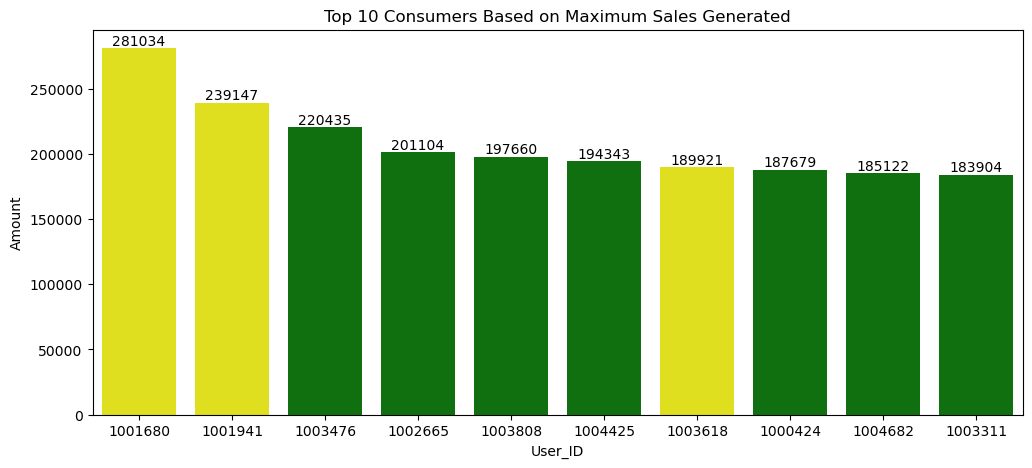

In [43]:
# subset data
top_consumers_by_amount = df[['User_ID', 'Gender', 'Amount']]

# Top 10 consumers based on maximum sales generated
top_consumers_by_amount = df.groupby(['User_ID', 'Gender'], as_index = False)['Amount'].sum().sort_values(
    by = 'Amount', ascending = False).head(10)

# Set color based on gender, green for female consumers and yellow for male consumers
col = []
for gender in top_consumers_by_amount['Gender']:
    if gender == 'F':
        col.append('green')
    else:
        col.append('yellow')

# Create barplot
plt.figure(figsize = (12, 5))
c = sns.barplot(data = top_consumers_by_amount, x = 'User_ID', y = 'Amount', palette = col,
                order = top_consumers_by_amount.sort_values(by = 'Amount', ascending = False).User_ID)

# Add bar labels
for bars in c.containers:
    c.bar_label(bars)

plt.title('Top 10 Consumers Based on Maximum Sales Generated');

* **Green** represents **female** and **yellow** represents **male.**
 
*  The maximum quantity sold refers to the total **sum of quantities purchased by consumers**, irrespective of the product category.

*  The maximum number of orders placed is the **total number of times a consumer has placed an order** with the company.

*  The maximum sales generated represents the **total sum of the amounts** spent by the consumers.

Majority of the consumers are **female** from the top **10 consumers list** but intrestingly **top 2 consumer** for maximum **sales generated** are **male** consumers. Similarly, the **male consumer** is at the **top 1** position in terms of **maximum quantity sold** and **maximum orders placed**. 

# **Total Orders Placed Based on Age Group**

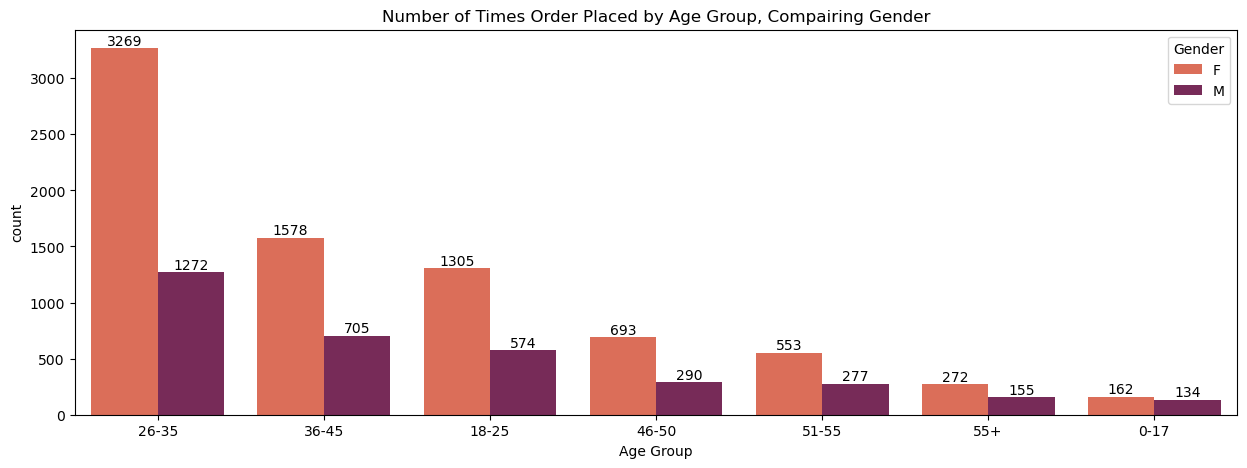

In [44]:
# Number of Times Order Placed by Age Group, Compairing Gender

# Set the plotsize
plt.figure(figsize = (15, 5))

dn = sns.countplot(data = df, x = 'Age Group', hue = 'Gender', palette = 'rocket_r',
                   order = df['Age Group'].value_counts().index) 

for bars in dn.containers:
    dn.bar_label(bars)

plt.title('Number of Times Order Placed by Age Group, Compairing Gender');

# **Total Sales Generated by Age Group (Amount in Millions)**

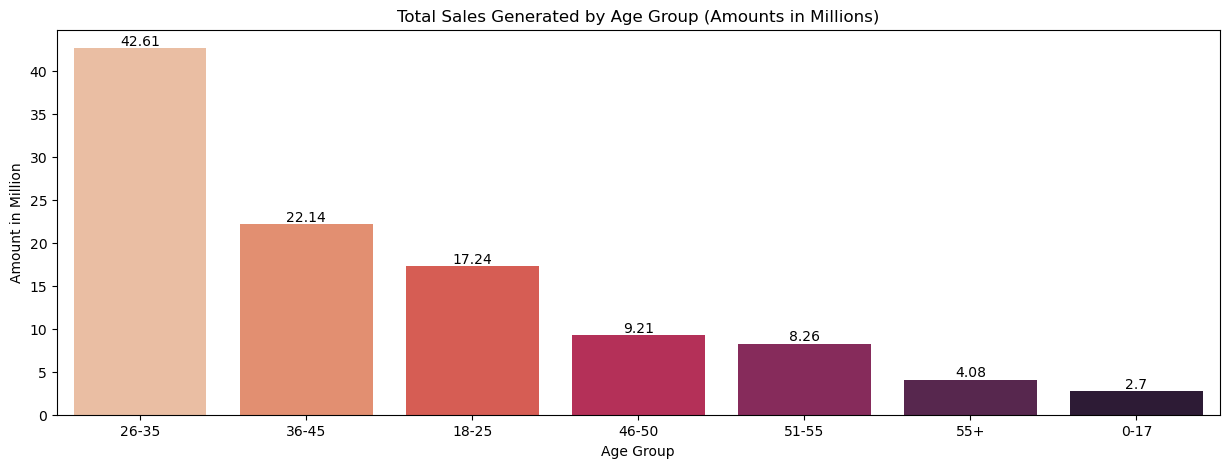

In [45]:
# Total sales generated by age group

# Subset data
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(
    by = 'Amount', ascending = False)

# Create a new variable and apply the function to the `Amount` column 
sales_age['amount_readable'] = sales_age['Amount'].apply(readable_num)

# Convert the data type to `float`
sales_age['amount_readable'] = sales_age['amount_readable'].astype(float)

# Set the size of the plot
plt.figure(figsize = (15, 5))

# Creating a barplot
s = sns.barplot(data = sales_age, x = 'Age Group', y = 'amount_readable', palette = 'rocket_r')

# Add labels
for bars in s.containers:
    s.bar_label(bars)

plt.ylabel('Amount in Million')
plt.title('Total Sales Generated by Age Group (Amounts in Millions)');

- **26-35, 36-45, and 18-25** are the top **3** age groups that have generated maximum sales and placed maximum number of orders.
  
- The **0-17** and **55+** age groups have placed the least orders and generated the least sales.

- **Female consumers** have placed the **highest number of orders** across all age groups.

# **Top 10 States Based on Maximum Orders Placed**

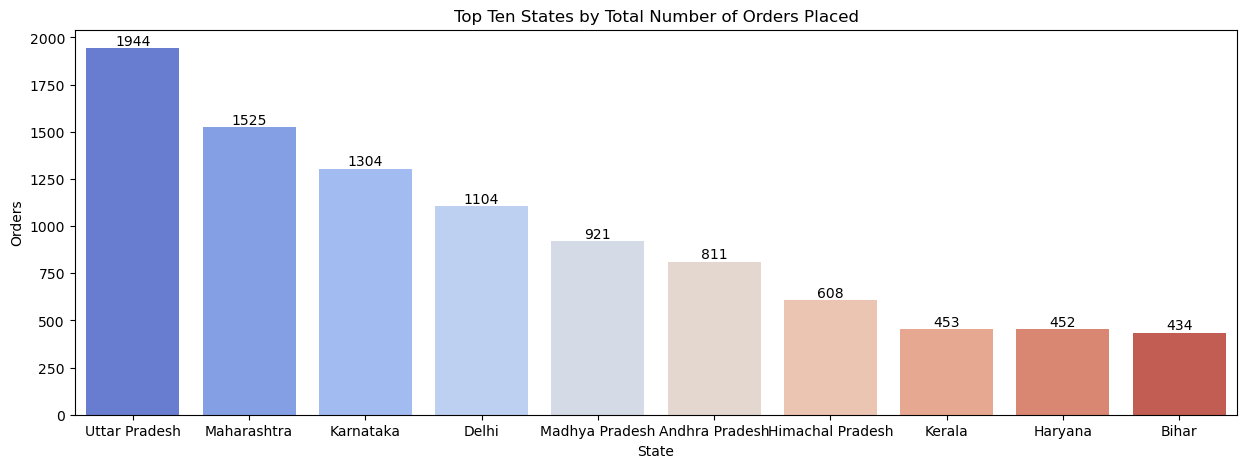

In [46]:
# Subset data
state_sales = df.groupby(['State'], as_index = False)['Orders'].count().sort_values(
    by = 'Orders', ascending = False).head(10)

#Set the size of the plot
plt.figure(figsize = (15, 5))

# Ceating a barplot
s = sns.barplot(data = state_sales, x = 'State', y = 'Orders', palette = 'coolwarm')

for bars in s.containers:
    s.bar_label(bars)

plt.title("Top Ten States by Total Number of Orders Placed");

- The above bar plot shows the total number of times orders are placed from a particular state.
  
- It clearly indicates that **Uttar Pradesh, Maharashtra, Karnataka** are the major states from where the **highest number of orders** are placed.

# **Top Ten States by Sales Generated**

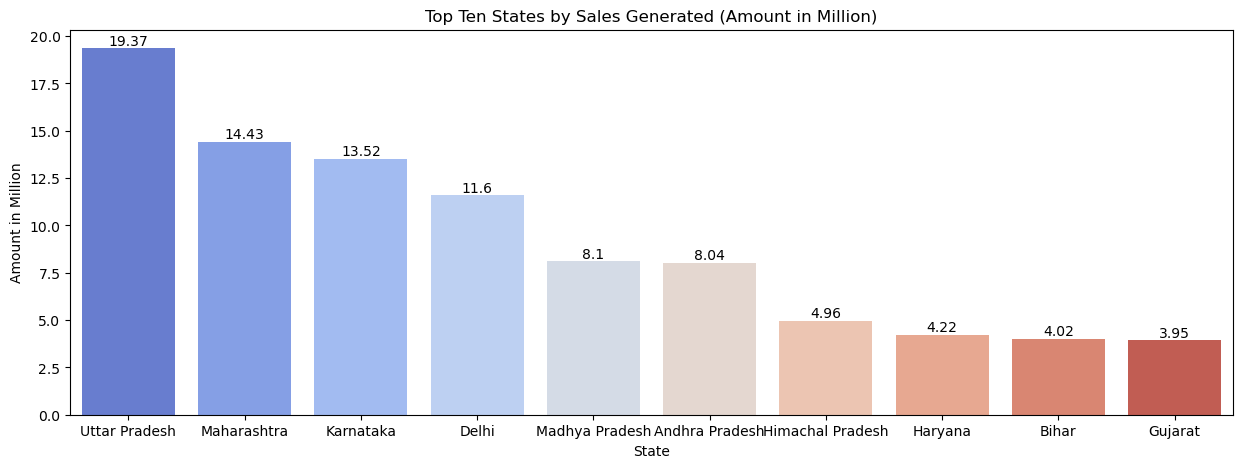

In [47]:
# Subset data
state_sales = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(
    by = 'Amount', ascending = False).head(10)

# Create a new variable and apply the function to the `Amount` column 
state_sales['amount_readable'] = state_sales['Amount'].apply(readable_num)

# Convert the data type to `float`
state_sales['amount_readable'] = state_sales['amount_readable'].astype(float)

#Set the size of the plot
plt.figure(figsize = (15, 5))

# Ceating a barplot
s = sns.barplot(data = state_sales, x = 'State', y = 'amount_readable', palette = 'coolwarm')

for bars in s.containers:
    s.bar_label(bars)

plt.ylabel('Amount in Million')
plt.title("Top Ten States by Sales Generated (Amount in Million)");

- The above bar plot shows the top states generating the highest sales.

- In terms of highest sales, **Uttar Pradesh, Maharashtra, Karnataka** are on the top **3** position.

- Here, **Kerala** is not on the list. This means that a good number of orders have been placed from Kerala but the sales generated is less. At the same time, **Gujarat** was not in the list of **top 10 orders** but it is at **10th place** in terms of **sales generated**.

# **Orders Placed Based on Gender & Martial Status**

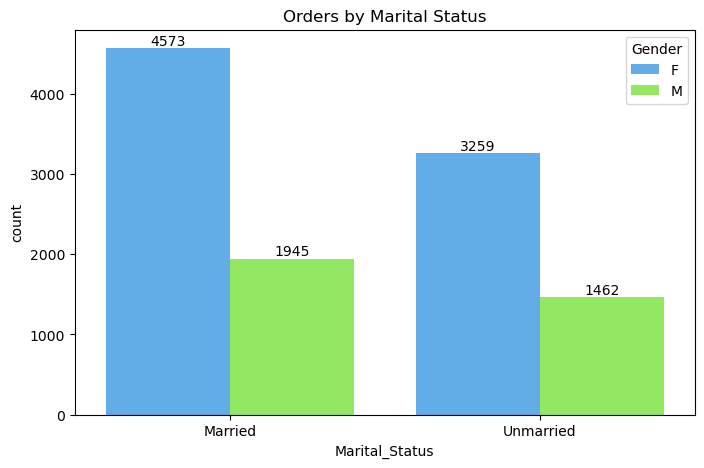

In [48]:
# Orders by Marital Status
# Set the size of the plot
plt.figure(figsize = (8, 5))

# Creating a countplot
m = sns.countplot(data = df, x = "Marital_Status", hue = 'Gender', palette = 'gist_rainbow_r', alpha = 0.7)

for bars in m.containers:
    m.bar_label(bars)

m.set_xticklabels(['Married', 'Unmarried'])    
plt.title("Orders by Marital Status");

# **Sales Generated Based on Gender & Martial Status**

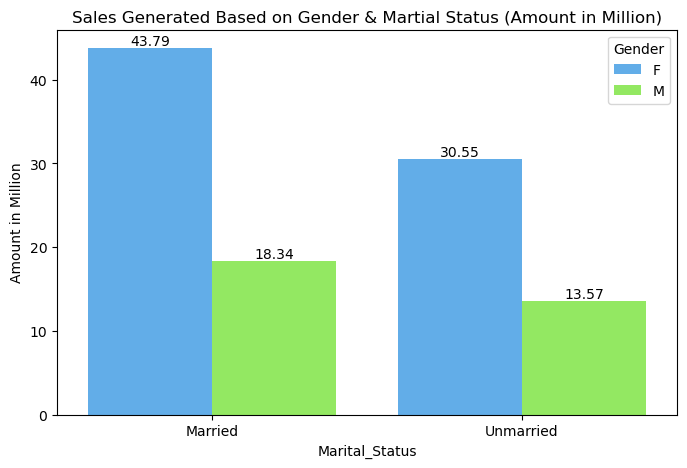

In [49]:
# Subset data
ms_sales = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(
    by = 'Amount', ascending = False)

# Create a new variable and apply the function to the `Amount` column 
ms_sales['amount_readable'] = ms_sales['Amount'].apply(readable_num)

# Convert the data type to `float`
ms_sales['amount_readable'] = ms_sales['amount_readable'].astype(float)

# Set the size of the barplot
plt.figure(figsize = (8,5))


# Creat barplot
a = sns.barplot(data = ms_sales, x = 'Marital_Status', y = 'amount_readable', hue = 'Gender', 
            palette = 'gist_rainbow_r', alpha = 0.7)

# Add bar labels
for bars in a.containers:
    a.bar_label(bars)

a.set_xticklabels(['Married', 'Unmarried'])
plt.ylabel('Amount in Million')
plt.title('Sales Generated Based on Gender & Martial Status (Amount in Million)');

- The number of orders placed by **married people is highest** compared to **unmarried people** for both genders. In terms of sales, the **maximum sales** is also generated from married people. 

- **Female married consumers** have placed maximum orders and have generated **41%** of sales.

# **Number of Times Order Placed by Product Category**

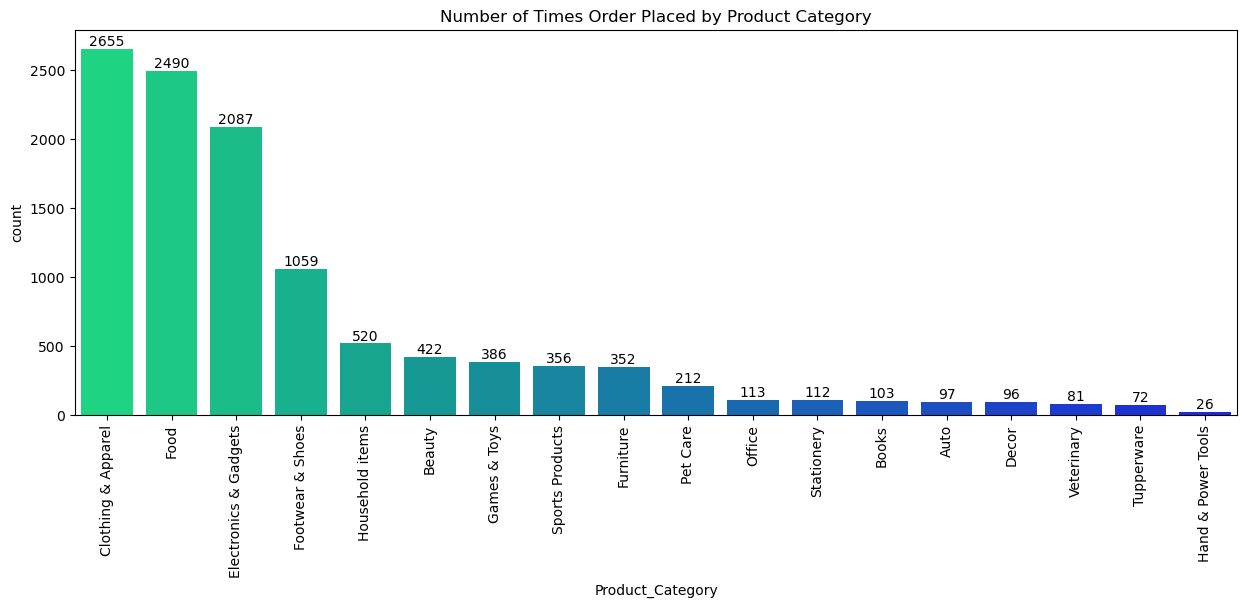

In [50]:
# Orders by Product Category
# Set the size of the plot
plt.figure(figsize = (15, 5))

pc = sns.countplot(data = df, x = 'Product_Category', palette = 'winter_r',
                   order = df['Product_Category'].value_counts().index)

# Add labels
for bars in pc.containers:
    pc.bar_label(bars)

plt.title("Number of Times Order Placed by Product Category")
plt.xticks(rotation = 90);

- **Clothing & Apparel, Food, Electronics & Gadgets, footwear & shoes, and household** items are the **top five** product categories from where orders were placed most frequently.

### **Total Quantities by Product Category**

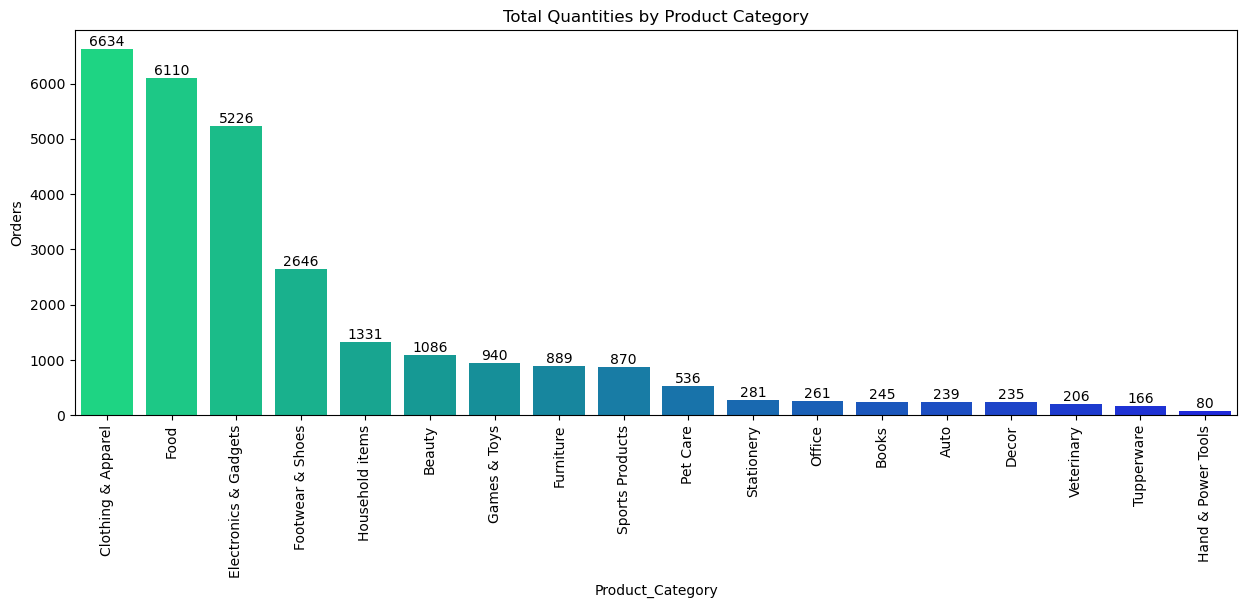

In [51]:
# Subset data
pc1 = df.groupby(['Product_Category'], as_index = False)['Orders'].sum().sort_values(
    by = 'Orders', ascending = False)

# Set the size of the plot
plt.figure(figsize = (15, 5))

# Create barplot
c = sns.barplot(data = pc1, x = 'Product_Category', y = 'Orders', palette = 'winter_r')

# Add labels
for bars in c.containers:
    c.bar_label(bars)

plt.title("Total Quantities by Product Category")
plt.xticks(rotation = 90);

- Again, in terms of total quantity sold, the top **5** **`Product_Category`** remains the same.

# **Sales Generated Based on Product Category**

In [52]:
# Subset data 
product = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(
    by = 'Amount', ascending = False).head(10)

# Create a new variable and apply the function to the `Amount` column 
product['amount_readable'] = product['Amount'].apply(readable_num)

# Convert the data type to `float`
product['amount_readable'] = product['amount_readable'].astype(float)

# Check the data type
product['amount_readable'].dtype

dtype('float64')

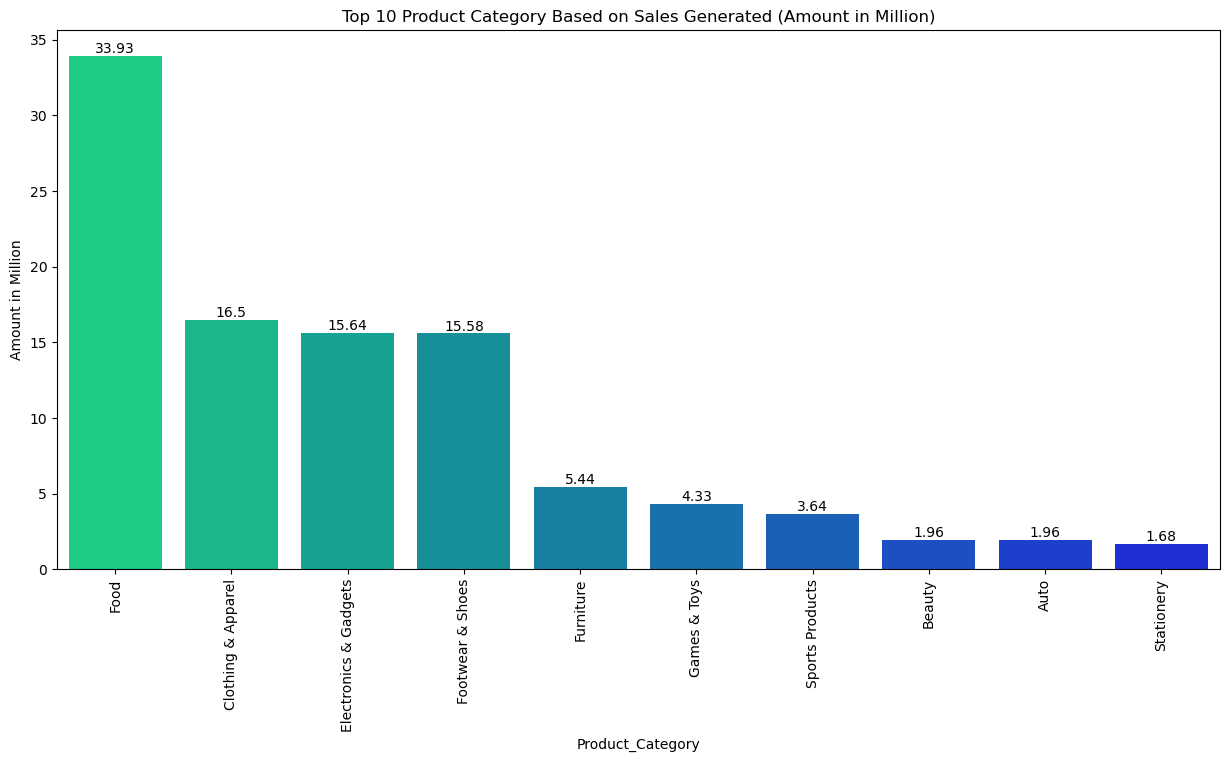

In [53]:
# Set the size of the barplot
plt.figure(figsize = (15, 7))

# Create barplot
p = sns.barplot(data = product, x = 'Product_Category', y = 'amount_readable', palette = 'winter_r')

# Add labels 
for bars in p.containers:
    p.bar_label(bars)

plt.ylabel('Amount in Million')
plt.title("Top 10 Product Category Based on Sales Generated (Amount in Million)")
plt.xticks(rotation = 90);

- In terms of sales generated by product category, **food, clothing & apparel, electronics & gadgets, footwear & shoes, and furniture** are in the **top 5.**

- Here, **furniture is at the fifth position** and **household items** do not even feature in the **top 10 list** in terms of sales generated.

# **Orders by Occupation**

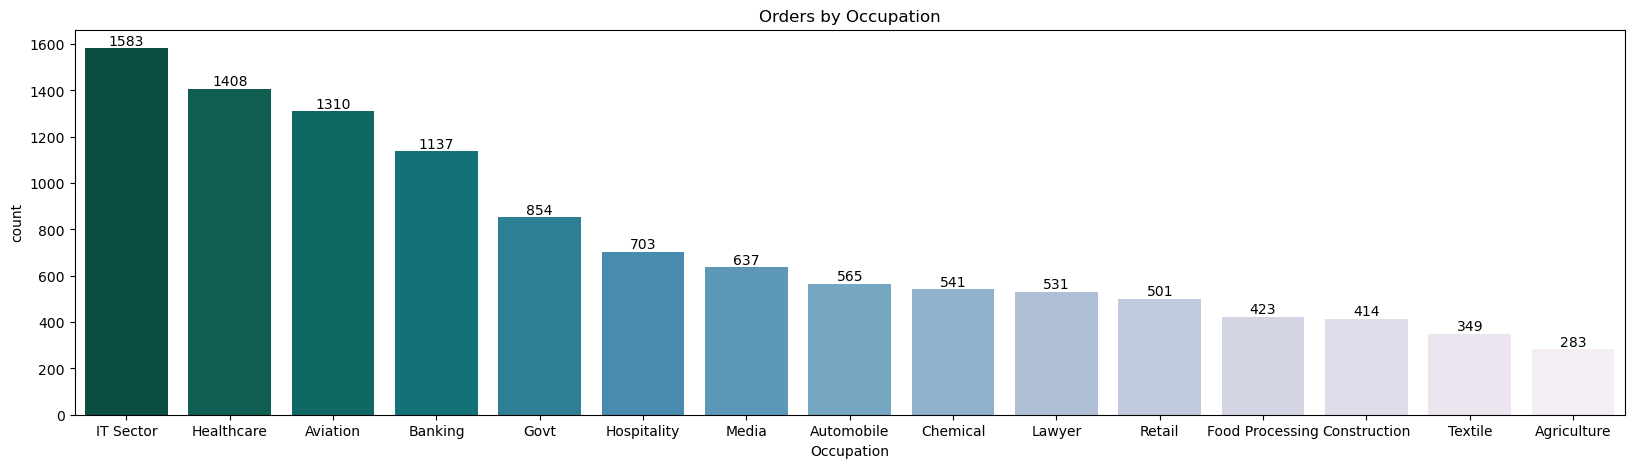

In [54]:
# Orders by Occupation

# Set the size of plot
plt.figure(figsize = (20,5))

# Creating a plot
o = sns.countplot(data = df, x = 'Occupation', palette = 'PuBuGn_r',
                  order = df['Occupation'].value_counts().index)

for bars in o.containers:
    o.bar_label(bars)
    
plt.title("Orders by Occupation");

# **Sales Generated by Occupation**

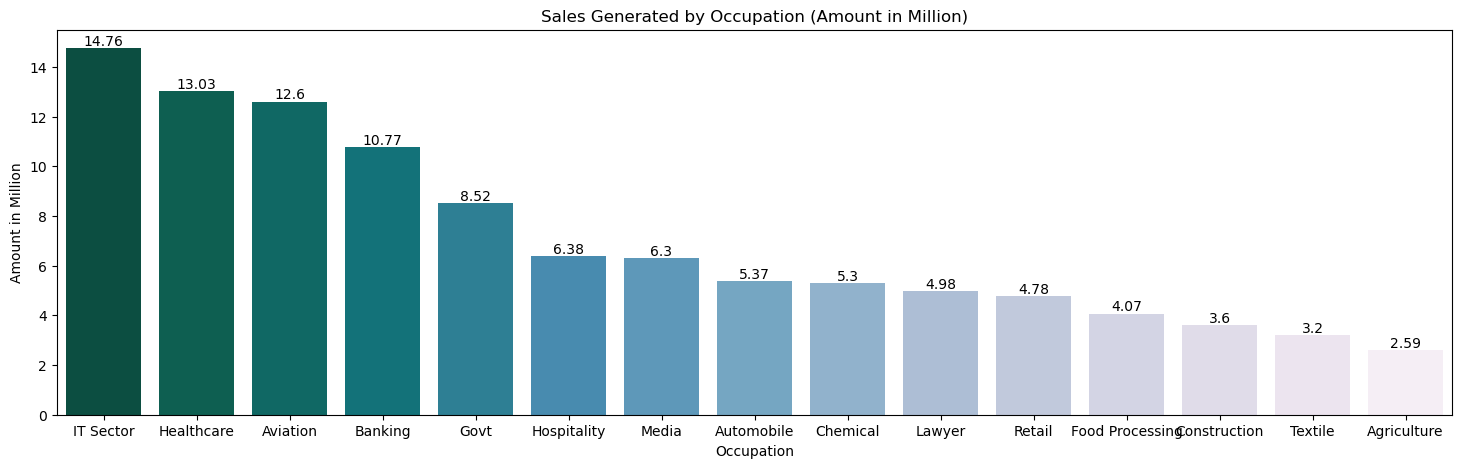

In [55]:
# Sales by occupation
occupation = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(
    by = 'Amount', ascending = False)

# Create a new variable and apply the function to the `Amount` column 
occupation['amount_readable'] = occupation['Amount'].apply(readable_num)

# Convert the data type to `float`
occupation['amount_readable'] = occupation['amount_readable'].astype(float)

# Set the plotsize
plt.figure(figsize = (18, 5))

# Creating a barplot
s = sns.barplot(data = occupation, x = "Occupation", y = 'amount_readable', palette = 'PuBuGn_r');

for bars in s.containers:
    s.bar_label(bars)

plt.ylabel('Amount in Million')
plt.title("Sales Generated by Occupation (Amount in Million)");

- The consumers who place orders frequently and contribute to generating maximum sales belong to the **IT sector, healthcare, aviation, banking, and government**. 

# **Top 10 Best Selling Products**

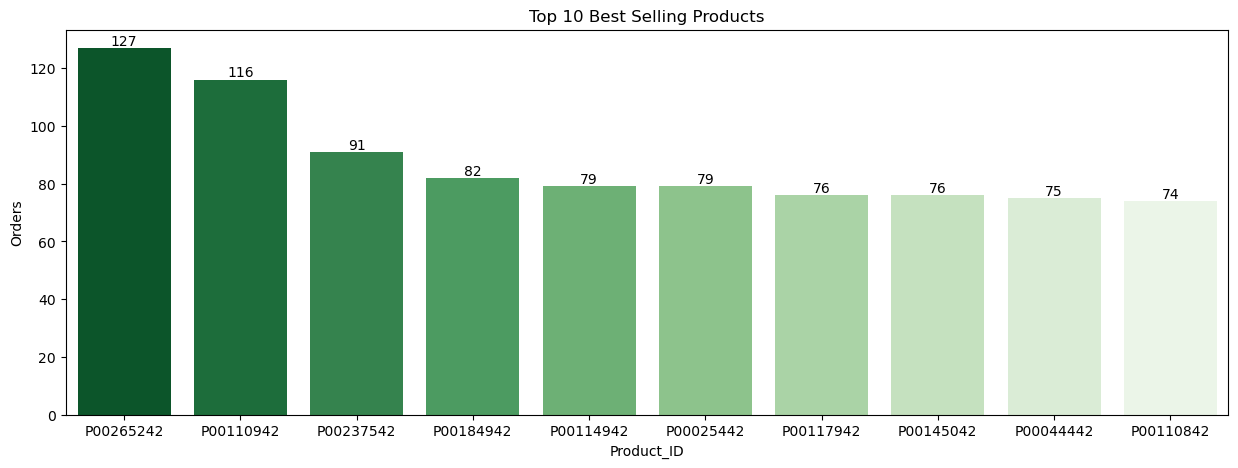

In [56]:
# Top 10 Best Selling products
# Subset data
top10 = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(
    by = 'Orders', ascending = False).head(10)

# Set the size of the barplot
plt.figure(figsize = (15, 5))

# Create barplot
d = sns.barplot(data = top10, x = 'Product_ID', y = 'Orders', palette = 'Greens_r')

# Add bar labels
for bars in d.containers:
    d.bar_label(bars)

plt.title('Top 10 Best Selling Products');

# **Least Performing Product Category by Orders Placed & Sales Generated**

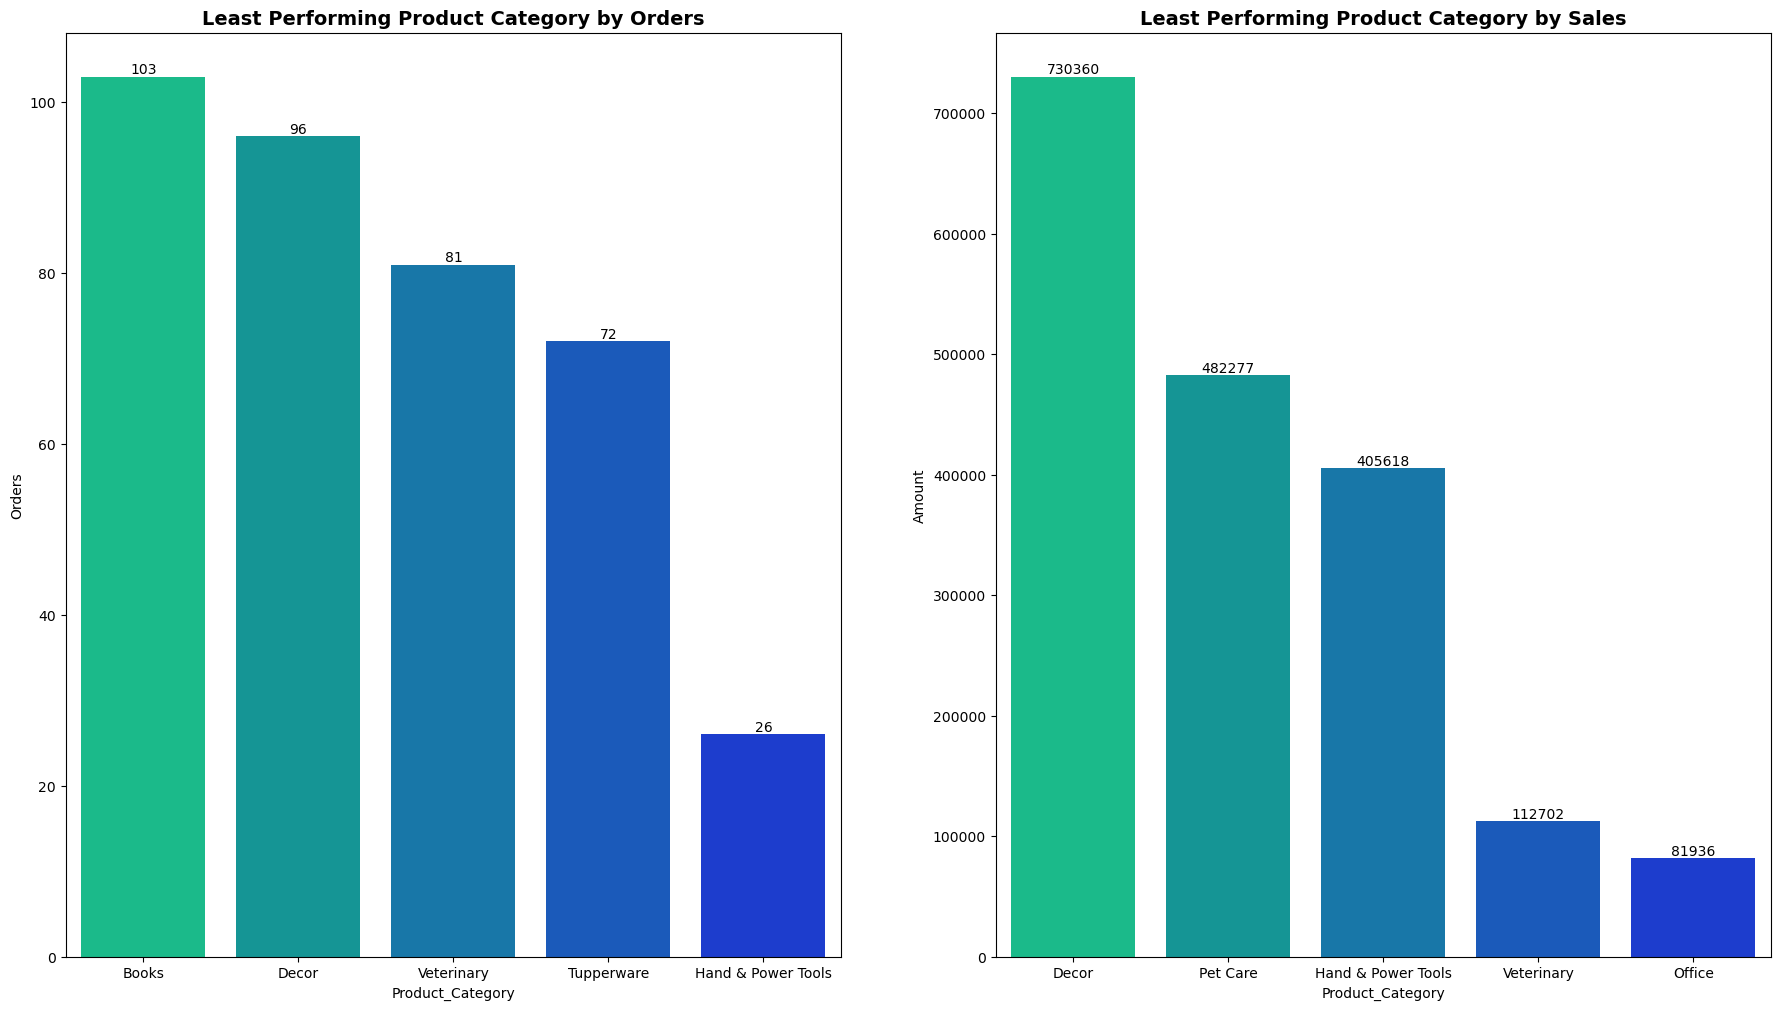

In [57]:
# Subset data for least product category in terms of Orders placed   
# Here 'Auto' from `Product_Category` is excluded
least_product_orders = df[df['Product_Category']!= 'Auto'].groupby(
    ['Product_Category'], as_index = False)['Orders'].count().sort_values(
    by = 'Orders', ascending = False).tail(5)


# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,12))

# Create barplot
b = sns.barplot(data = least_product_orders, x = 'Product_Category', y = 'Orders', ax = ax[0],
               palette = 'winter_r')

# Add bar labels
for bars in b.containers:
    b.bar_label(bars)

# Set title
ax[0].set_title('Least Performing Product Category by Orders', 
                fontsize= 14, weight = 'bold');

# Subset data for least product category in terms of sales generated
least_product = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(
    by = 'Amount', ascending = False).tail(5)

# Create barplot
a = sns.barplot(data = least_product, x = 'Product_Category', y = 'Amount', ax = ax[1],
               palette = 'winter_r')

# Add bar labels
for bars in a.containers:
    a.bar_label(bars)

# Set title
ax[1].set_title('Least Performing Product Category by Sales', 
                fontsize= 14, weight = 'bold');

- The barplot above displays low performing product categories that are ordered **less frequently and generate fewer sales.**

- In the above plot **'Auto'**  product category is excluded from the first bar plot (Products from this category are expensive). There are fewer orders placed from this category, but it has generated a decent amount of sales and is ranked **9th in the top 10 list**, hence it has been excluded. 

- There are some product categories that seem to be in **low demand** such as **Tupperware, veterinary, hand and power tools, and decor.** It appears that the **office products category** is in **good demand** but generates the **lowest sales.**

In [58]:
# Top 5 product category for female consumers
Product_female = df[df['Gender']=='F'].groupby(
    ['Product_Category'], as_index = False)['Amount'].sum().sort_values(
    by = 'Amount', ascending = False).head(5)

Product_female

,Product_Category,Amount
6,Food,24176102
7,Footwear & Shoes,11534547
3,Clothing & Apparel,11479103
5,Electronics & Gadgets,11033097
8,Furniture,3394642


In [59]:
# Top 5 product category for female consumers
Product_male = df[df['Gender']=='M'].groupby(
    ['Product_Category'], as_index = False)['Amount'].sum().sort_values(
    by = 'Amount', ascending = False).head(5)

Product_male

,Product_Category,Amount
6,Food,9757781
3,Clothing & Apparel,5015916
5,Electronics & Gadgets,4610749
7,Footwear & Shoes,4040662
8,Furniture,2045409


# **Key Takeaways**
📌 Sales are highly influenced by **demographic factors such as gender, age, and occupation.**

📌 Certain geographical regions exhibit **stronger sales performance**, indicating **potential expansion opportunities.**

📌 Some product categories **significantly outperform others**, guiding inventory and marketing strategies.

📌 **Data inconsistencies** suggest the need for additional variables to refine consumer behavior analysis.


# **Conclusion**

- The total sales is **106.25 million**.

- There are more female consumers than male consumers in this dataset. So, it is expected to have maximum sales generated from the female consumers. **74.34 million of sales** was generated by female consumers which is approximately **70%** of total sales.

- Consumers who are purchasing **frequently** are those working in the **IT sector, healthcare, aviation, and banking sectors for both genders.**

- For both genders, **married people** are making **more purchases than unmarried people.** Especially, **female married consumers,** they have placed maximum orders and have generated **41%** of sales.

- **26-35, 36-45, and 18-25** are the **top 3 age groups** that have generated maximum sales and placed maximum number of orders. Female consumers have placed the highest number of orders across all age groups.

- **Uttar Pradesh, Maharashtra, Karnataka** are the major states from where the highest number of orders are placed.

- **Food, clothing & apparel, electronics & gadgets, footwear & shoes, and household items** are the **top 5 product category** for both genders. They buy products from these categories frequently. 

## **Is there any problem with the data?**

- Yes, for some users **`age`, `occupation`, and `gender`** is not the same for every order they have placed. 

## **What Kind of additional data is required?**

- **Order ID, order date, order time, and payment mode** are some of the additional data required. 

- This additional data will help us learn more about **consumer behavior patterns** and to **spot trends.**

- Understanding consumer behavior can be helpful in targeting audiences for **marketing campaigns.**